# Crime data visualization in San Francisco

San Francisco has one of the most "open data" policies of any large city. In this lab, we are going to download about 254M of data (726,914 rows) describing all police incidents since 2018 (I'm grabbing data on May 2023).

## Getting started

Download [Police Department Incident Reports 2018 to present](https://data.sfgov.org/Public-Safety/Police-Department-Incident-Reports-2018-to-Present/wg3w-h783) or, if you want, all [San Francisco police department incident since 1 January 2003](https://data.sfgov.org/Public-Safety/SFPD-Incidents-from-1-January-2003/tmnf-yvry). 


In [12]:
! curl 'https://data.sfgov.org/api/views/wg3w-h783/rows.csv?accessType=DOWNLOAD&bom=true&format=true' > /tmp/SFPD.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  269M    0  269M    0     0  3381k      0 --:--:--  0:01:21 --:--:-- 1826k 0     0      0      0 --:--:-- --:--:-- --:--:--     0385k      0 --:--:--  0:00:06 --:--:-- 4953k  4470k      0 --:--:--  0:00:09 --:--:-- 4654k4k      0 --:--:--  0:00:10 --:--:-- 4755k    0     0  4670k      0 --:--:--  0:00:23 --:--:-- 4839k 0     0  4327k      0 --:--:--  0:00:36 --:--:-- 2481k     0  3886k      0 --:--:--  0:00:46 --:--:-- 2322kM    0     0  3859k      0 --:--:--  0:00:47 --:--:-- 2397k    0 --:--:--  0:00:50 --:--:-- 2706k --:--:--  0:00:51 --:--:-- 2808k245M    0     0  3677k      0 --:--:--  0:01:08 --:--:-- 2486k


We can easily figure out how many records there are:

In [13]:
! wc -l /tmp/SFPD.csv

  770014 /tmp/SFPD.csv


So that's currently about 770k records.

## Look the data

Let's assume the file you downloaded and is in `/tmp`. I am taking the first 10 rows and transposing the table to have a better look at it.

In [2]:
import pandas as pd

df_sfpd = pd.read_csv('/tmp/SFPD.csv')
df_sfpd.head(10).T

,0,1,2,3,4,5,6,7,8,9
Incident Datetime,2023/03/13 11:41:00 PM,2023/03/01 05:02:00 AM,2023/03/13 01:16:00 PM,2023/03/13 10:59:00 AM,2023/03/14 06:44:00 PM,2023/02/15 03:00:00 AM,2023/03/11 12:30:00 PM,2023/03/13 11:26:00 AM,2023/03/11 03:00:00 PM,2023/03/11 02:00:00 PM
Incident Date,2023/03/13,2023/03/01,2023/03/13,2023/03/13,2023/03/14,2023/02/15,2023/03/11,2023/03/13,2023/03/11,2023/03/11
Incident Time,23:41,05:02,13:16,10:59,18:44,03:00,12:30,11:26,15:00,14:00
Incident Year,2023,2023,2023,2023,2023,2023,2023,2023,2023,2023
Incident Day of Week,Monday,Wednesday,Monday,Monday,Tuesday,Wednesday,Saturday,Monday,Saturday,Saturday
Report Datetime,2023/03/13 11:41:00 PM,2023/03/11 03:40:00 PM,2023/03/13 01:17:00 PM,2023/03/13 11:00:00 AM,2023/03/14 06:45:00 PM,2023/03/11 04:55:00 PM,2023/03/12 04:15:00 PM,2023/03/13 01:37:00 PM,2023/03/13 08:29:00 AM,2023/03/15 11:21:00 AM
Row ID,125373607041,125379506374,125357107041,125355107041,125402407041,125378606372,125381606244,125419506244,125420606244,125431804134
Incident ID,1253736,1253795,1253571,1253551,1254024,1253786,1253816,1254195,1254206,1254318
Incident Number,230167874,236046151,220343896,230174885,230176728,236046123,236046004,236046850,236045937,230182844
CAD Number,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,230741133.0


To get a better idea of what the data looks like, let's do a simple histogram of the categories and crime descriptions. 

In [3]:
df_sfpd['Incident Category'].unique()

array(['Recovered Vehicle', 'Larceny Theft', 'Assault', 'Lost Property',
       'Drug Violation', 'Malicious Mischief', 'Drug Offense',
       'Non-Criminal', 'Fraud', 'Warrant', 'Other Offenses', 'Robbery',
       'Case Closure', 'Other Miscellaneous', 'Stolen Property',
       'Offences Against The Family And Children', 'Other',
       'Motor Vehicle Theft', 'Traffic Collision', 'Suspicious Occ',
       'Missing Person', 'Disorderly Conduct', 'Weapons Carrying Etc',
       'Rape', 'Burglary', 'Fire Report', 'Arson', 'Vandalism', 'Suicide',
       'Traffic Violation Arrest', 'Courtesy Report',
       'Forgery And Counterfeiting', 'Weapons Offense', 'Embezzlement',
       'Vehicle Misplaced', 'Miscellaneous Investigation', 'Suspicious',
       nan, 'Prostitution', 'Vehicle Impounded', 'Sex Offense',
       'Liquor Laws', 'Human Trafficking, Commercial Sex Acts',
       'Gambling', 'Homicide', 'Motor Vehicle Theft?',
       'Human Trafficking (A), Commercial Sex Acts', 'Weapons Offence'

In [4]:
from collections import Counter
counter = Counter(df_sfpd['Incident Category'])
counter.most_common(10)

[('Larceny Theft', 235443),
 ('Other Miscellaneous', 52532),
 ('Malicious Mischief', 52081),
 ('Assault', 46570),
 ('Non-Criminal', 45541),
 ('Burglary', 43023),
 ('Motor Vehicle Theft', 40663),
 ('Recovered Vehicle', 30642),
 ('Fraud', 25029),
 ('Lost Property', 22376)]

In [6]:
#counter

In [7]:
from collections import Counter
counter = Counter(df_sfpd['Incident Description'])
counter.most_common(10)

[('Theft, From Locked Vehicle, >$950', 97421),
 ('Malicious Mischief, Vandalism to Property', 25471),
 ('Battery', 22777),
 ('Vehicle, Recovered, Auto', 22474),
 ('Lost Property', 22376),
 ('Theft, Other Property, $50-$200', 21931),
 ('Vehicle, Stolen, Auto', 21774),
 ('Theft, Other Property, >$950', 18462),
 ('Mental Health Detention', 16647),
 ('Theft, From Unlocked Vehicle, >$950', 15296)]

## Word clouds

A more interesting way to visualize differences in term frequency is using a so-called word cloud.  

Python has a nice library you can use:

```bash
$ pip install wordcloud
```

wordcloud = WordCloud(width=1800,
                      height=1400,
                      max_words=10000,
                      random_state=1,
                      relative_scaling=0.25)

wordcloud.fit_words(categories)

plt.imshow(wordcloud)
plt.axis("off")
plt.show()
```

In [8]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
import pandas as pd
import sys

In [9]:
# delete Incident Categories with nan 
categories = df_sfpd['Incident Category']
len(categories)

770013

In [10]:
categories = categories.dropna()
len(categories)

769328

In [11]:
freq = Counter(categories)
freq

Counter({'Recovered Vehicle': 30642,
         'Larceny Theft': 235443,
         'Assault': 46570,
         'Lost Property': 22376,
         'Drug Violation': 257,
         'Malicious Mischief': 52081,
         'Drug Offense': 18779,
         'Non-Criminal': 45541,
         'Fraud': 25029,
         'Warrant': 21803,
         'Other Offenses': 6579,
         'Robbery': 17242,
         'Case Closure': 3095,
         'Other Miscellaneous': 52532,
         'Stolen Property': 3753,
         'Offences Against The Family And Children': 10207,
         'Other': 6362,
         'Motor Vehicle Theft': 40663,
         'Traffic Collision': 1811,
         'Suspicious Occ': 15755,
         'Missing Person': 16582,
         'Disorderly Conduct': 12735,
         'Weapons Carrying Etc': 4278,
         'Rape': 188,
         'Burglary': 43023,
         'Fire Report': 1139,
         'Arson': 2184,
         'Vandalism': 1701,
         'Suicide': 345,
         'Traffic Violation Arrest': 7198,
         'Court

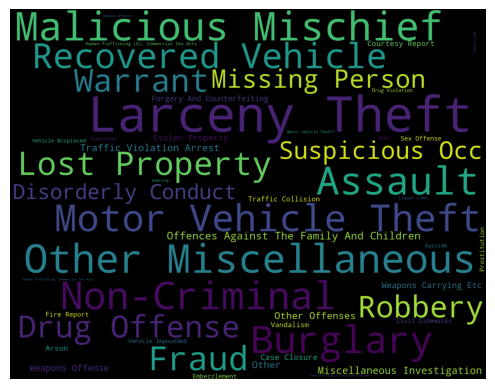

In [12]:
wordcloud = WordCloud(width=1800,
                      height=1400,
                      max_words=10000,
                      random_state=1,
                      relative_scaling=0.25)

wordcloud.fit_words(freq)

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### Which neighborhood is the "worst"?

**Exercise**: Now, pullout the neighborthood and do a word cloud:

### Crimes per neighborhood


**Exercise**: Filter the data using pandas from a particular precinct or neighborhood, such as Mission and South of Market.  Modify the code above to create a wordclod per neighbourhood. 

### Which neighborhood has most car thefts?

**Exercise**: Filter for `Motor Vehicle Theft`. Create a worldcloud of nei

